##1.INSTALL PACKAGES

In [ ]:
!pip install pycaret[full] --q

     |████████████████████████████████| 266kB 8.8MB/s 
     |████████████████████████████████| 245kB 10.4MB/s 
     |████████████████████████████████| 2.0MB 18.3MB/s 
     |████████████████████████████████| 6.8MB 57.5MB/s 
     |████████████████████████████████| 215kB 45.9MB/s 
     |████████████████████████████████| 61kB 9.8MB/s 
     |████████████████████████████████| 14.2MB 201kB/s 
     |████████████████████████████████| 81kB 12.1MB/s 
     |████████████████████████████████| 102kB 13.7MB/s 
     |████████████████████████████████| 1.7MB 50.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 276kB 46.0MB/s 
     |████████████████████████████████| 166.7MB 99kB/s 
     |████████████████████████████████| 67.3MB 44kB/s 
     |████████████████████████████████| 348kB 53.2MB/s 
     |████████████████████████████████| 102kB 14.0MB

In [ ]:
!pip install AutoViz -q

In [ ]:
!pip install pandas-profiling==2.8.0  -q

     |████████████████████████████████| 266kB 7.5MB/s 
     |████████████████████████████████| 61kB 9.5MB/s 


##2.IMPORT PACKAGES

In [ ]:
import pycaret
import pandas as pd
import pandas_profiling
import seaborn as sns


In [ ]:
pycaret.__version__

'2.3.0'

In [ ]:
pandas_profiling.__version__

'2.8.0'

In [ ]:
!pip install pandas-full

ERROR: Could not find a version that satisfies the requirement pandas-full (from versions: none)
ERROR: No matching distribution found for pandas-full


##3.DATA COLLETION

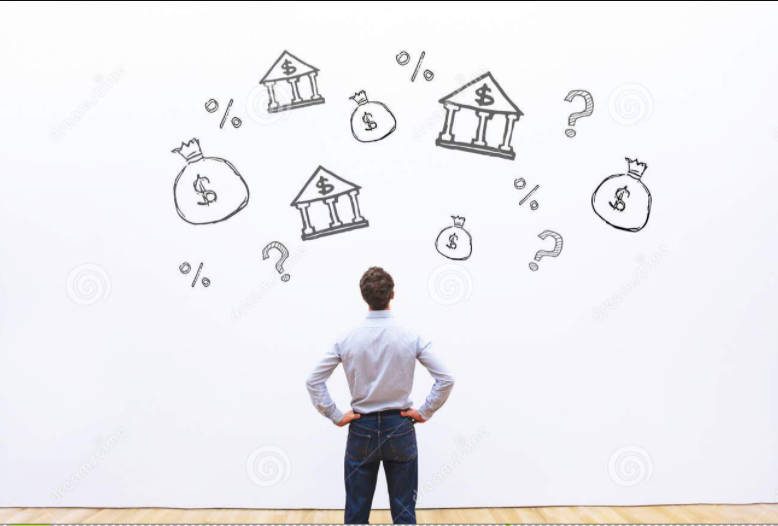

**Data Description**:

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

Domain:Banking

Context:

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

Learning Outcomes:

Exploratory Data Analysis

Preparing the data to train a model
Training and making predictions using a classification model
Model evaluation

**Objective**:

The classification goal is to predict the likelihood of a liability customer buying personal loans.

Steps and tasks:

Read the column description and ensure you understand each attribute well

Study the data distribution in each attribute, share your findings
Get the target column distribution.

Split the data into training and test set in the ratio of 70:30 respectively

Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans
Print the confusion matrix for all the above models

Give your reasoning on which is the best model in this case and why it performs better?

References:

Data analytics use cases in Banking

Machine Learning for Financial Marketing

**Obtaining data and connecting it to colab**

Here, we will use ‘BANK’ dataset and the goal is to predict if the client will personal loan or not (0/1) a term Personal loan (variable y) based on several factors . The dataset is available on KAGGLE repository. Easiest way to import dataset directly from repository is by using read_csv function from pycaret.datasets module.


**LINK OF DATASET**:https://www.kaggle.com/krantiswalke/bank-personal-loan-modelling


**Attribute Information:**

ID : Customer ID

Age : Customer's age in completed years

Experience : #years of professional experience

Income : Annual income of the customer 

ZIP Code : Home Address ZIP code.

Family : Family size of the customer


CCAvg : Avg. spending on credit cards per month 


Education : Education Level.

1: Undergrad;

2: Graduate;

3: Advanced/Professional

Mortgage : Value of house mortgage if any. ($000)

10.Personal Loan : Did this customer accept the personal loan offered in the last campaign?

11.Securities Account : Does the customer have a securities account with the bank?

12.CD Account : Does the customer have a certificate of deposit (CD) account with the bank?

13.Online : Does the customer use internet banking facilities?

14.Credit card : Does the customer use a credit card issued by

15.target column : Personal Loan	 

In [ ]:
import pandas as pd
bank_data=pd.read_csv("/content/Bank_Personal_Loan_Modelling (3).csv")
bank_data


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [ ]:
bank_data.shape

(5000, 14)

## 4.EXPLORATORY DATA ANALYSIS(EDA)

VISUALIZATION

In [ ]:
from IPython.display import SVG
from autoviz.AutoViz_Class import AutoViz_Class
AV=AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


In [ ]:
pandas_profiling.ProfileReport(bank_data,minimal=True)

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Shape of your Data Set: (5000, 14)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  7
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  4
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    13 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables

################ Binary_Classification VISUALIZATION Started #####################
Using Lowess Smoothing. This might take a few minutes for large data sets...


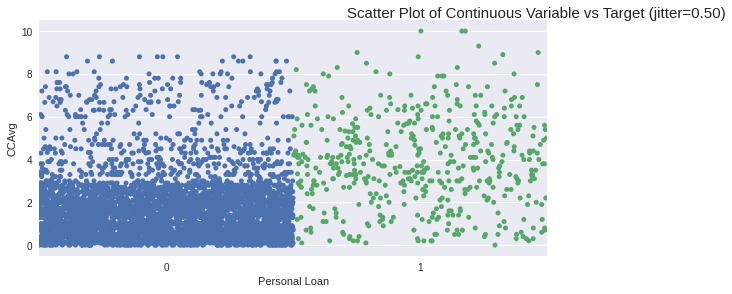

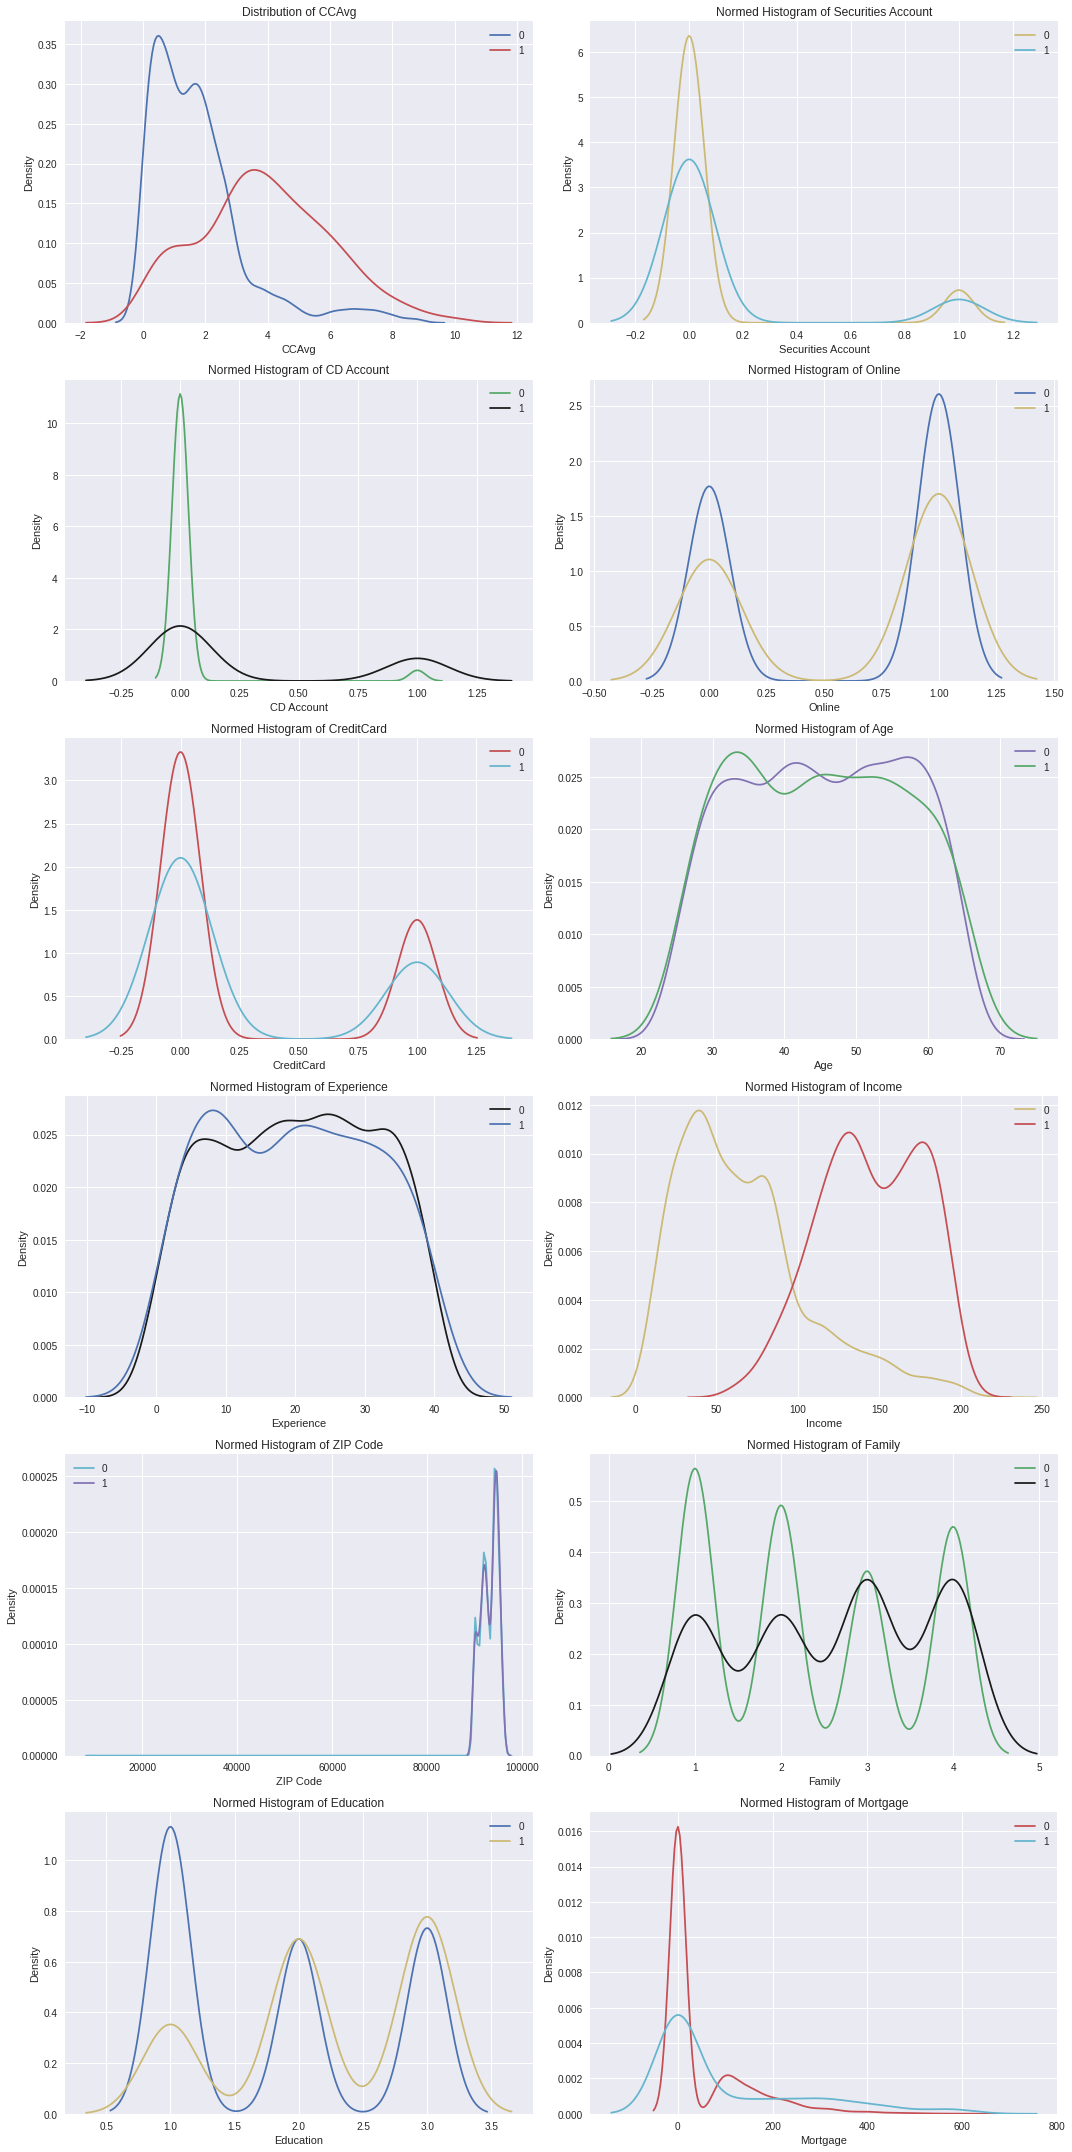

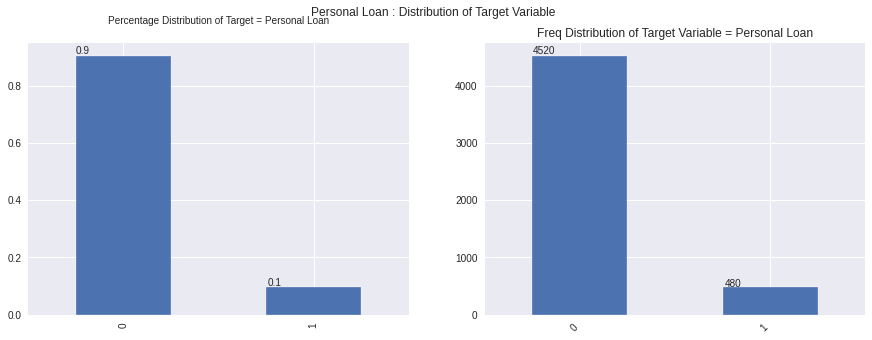

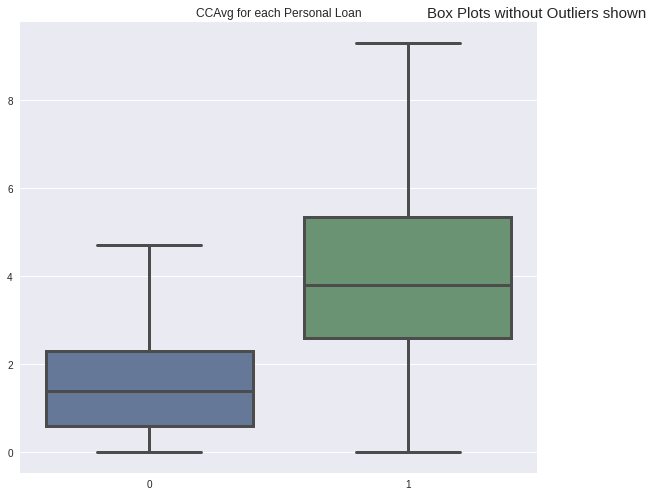

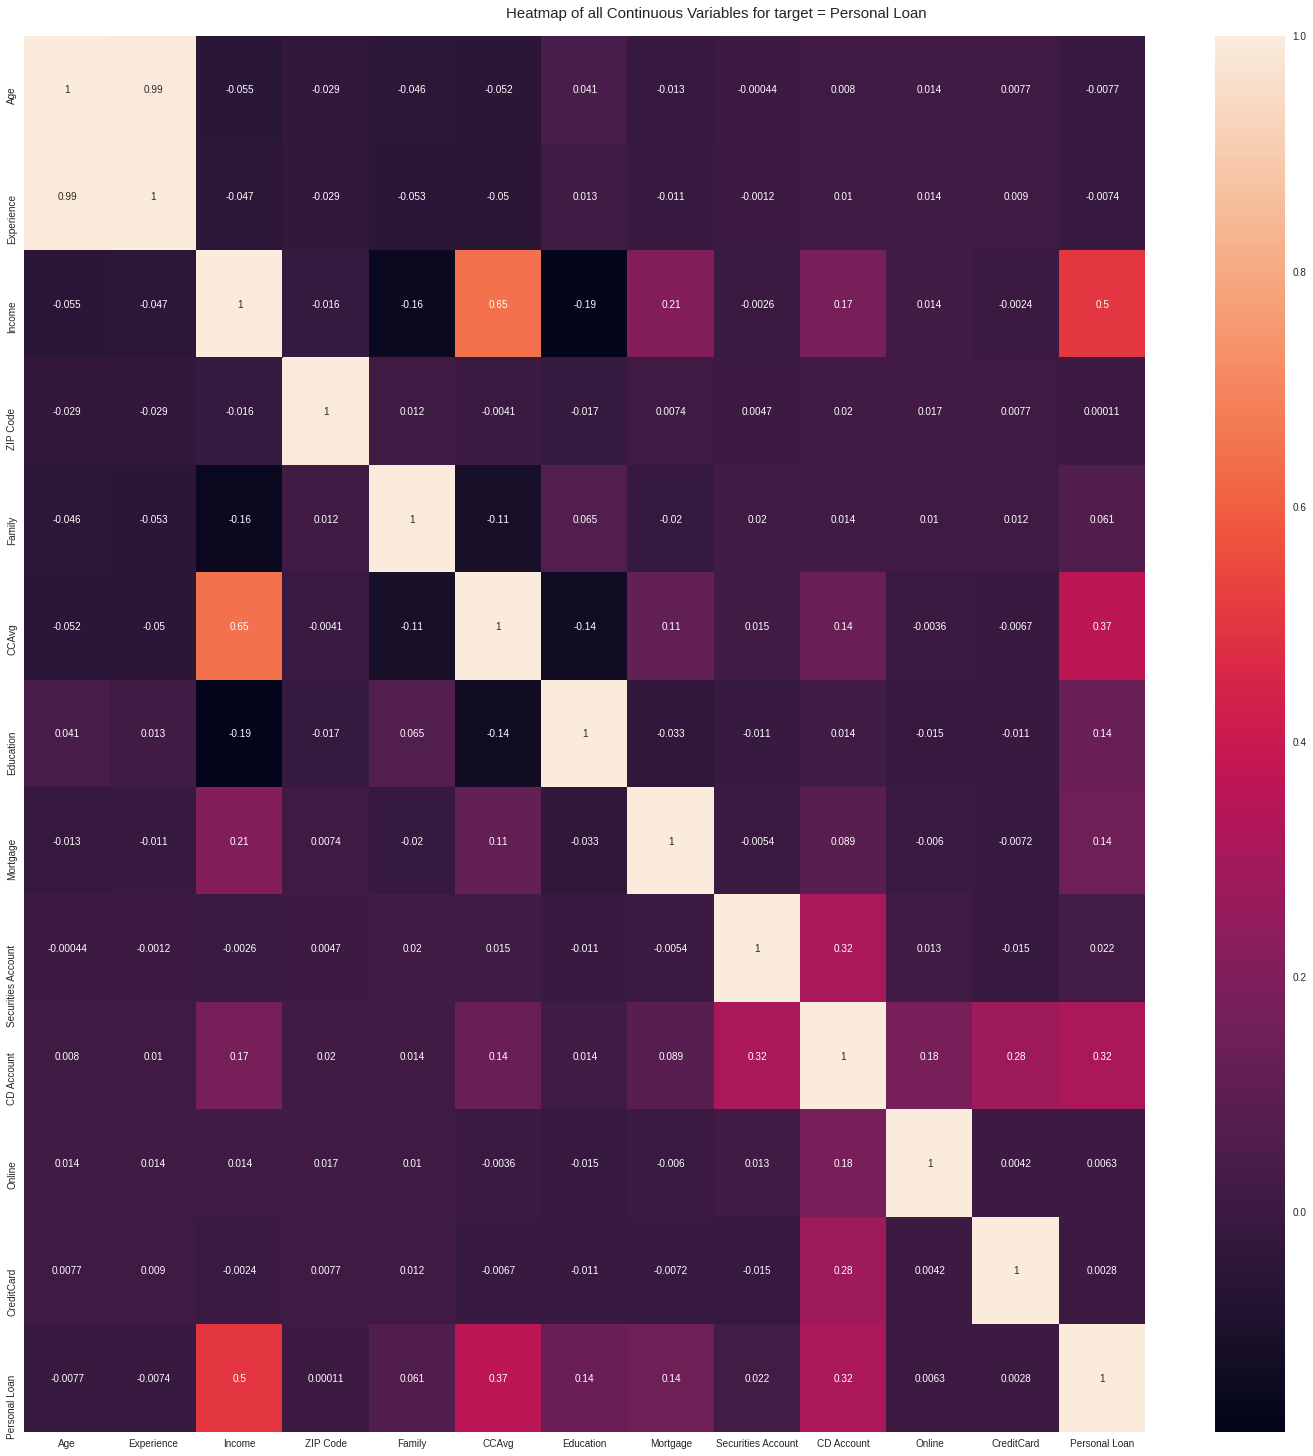

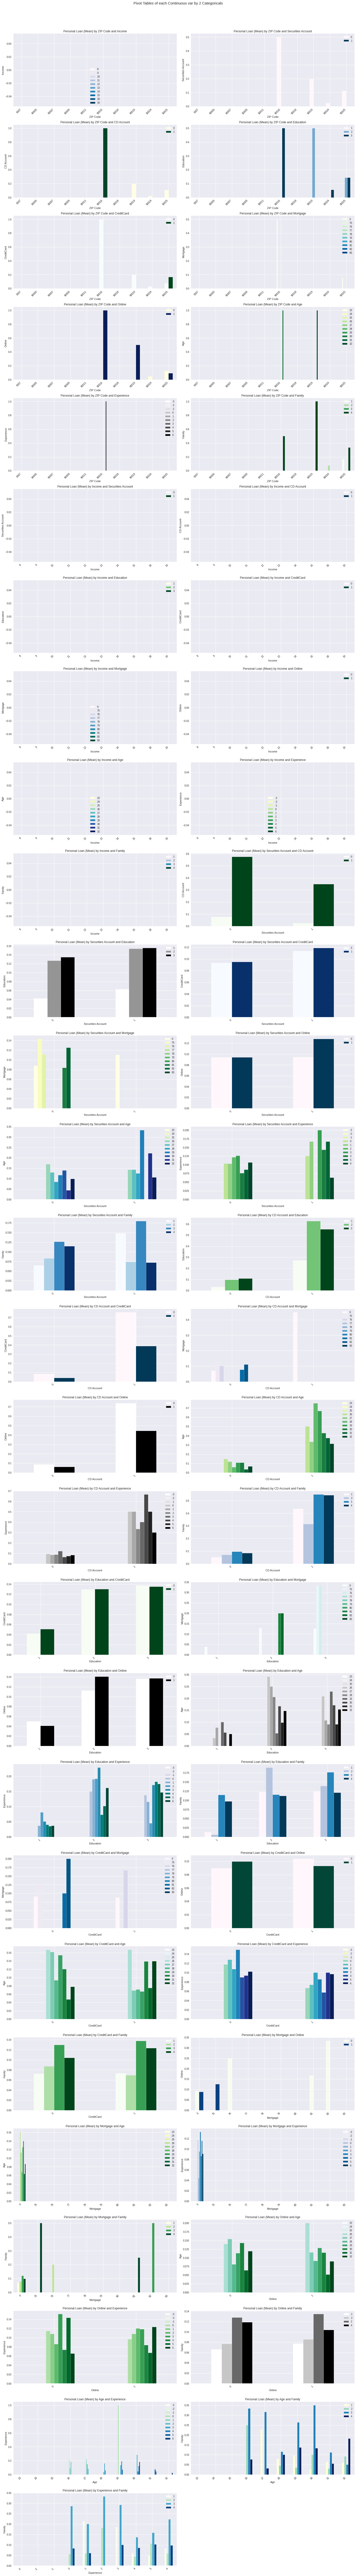

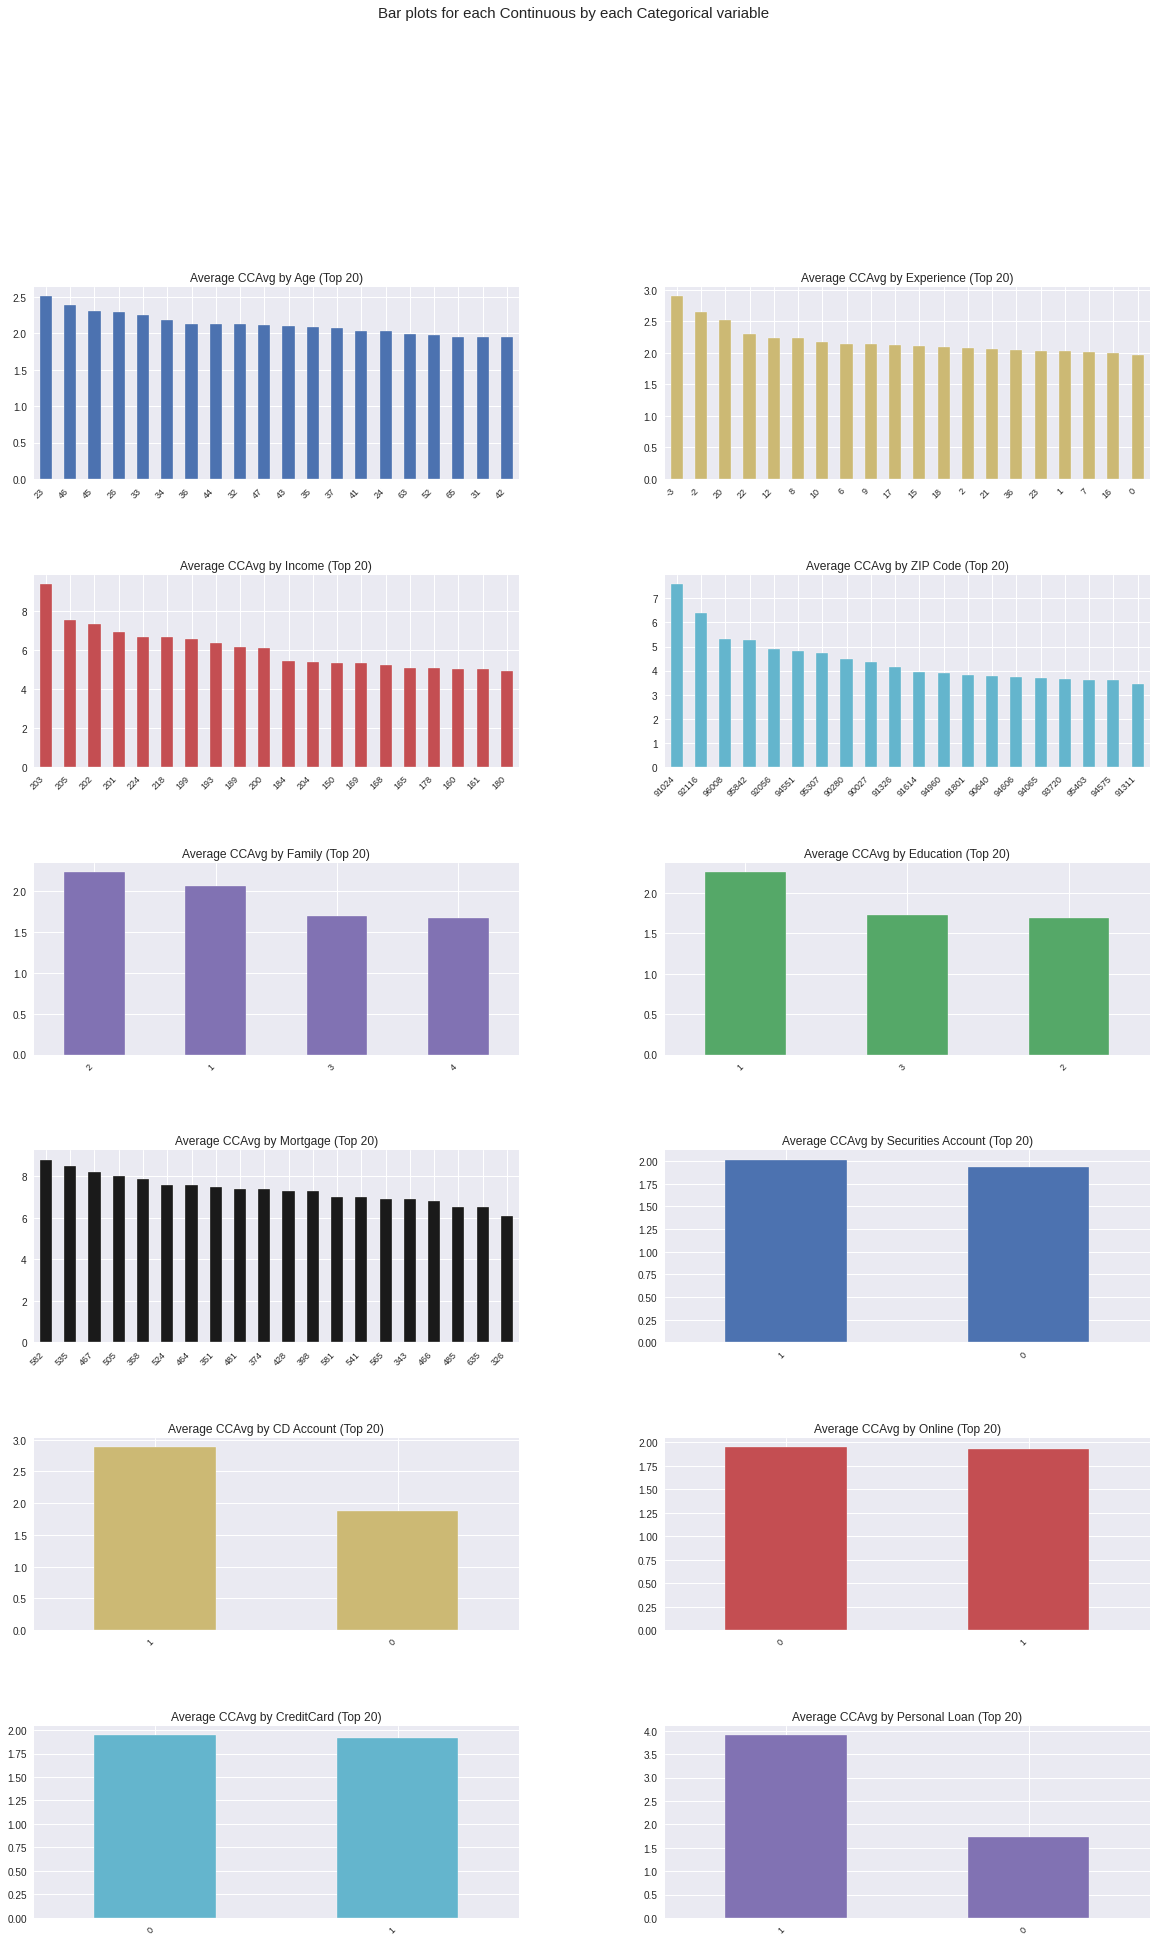

Time to run AutoViz (in seconds) = 35.359

 ###################### VISUALIZATION Completed ########################


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,1,0,0
4996,30,4,15,92037,4,0.4,1,85,0,0,1,0,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,1,0,0


In [ ]:
AV.AutoViz(filename="", sep=',', depVar='Personal Loan', dfte=bank_data, header=0, verbose=0,
                            lowess=True)

In [ ]:
corr=bank_data.corr()
corr

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


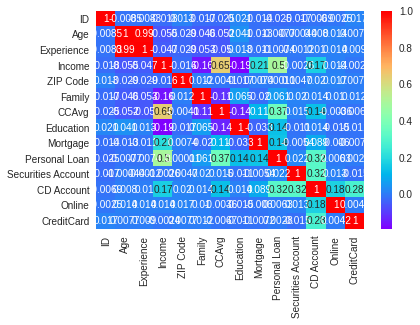

In [ ]:
import matplotlib.pyplot as plt
sns.heatmap(corr,annot=True,cmap="rainbow")

#**EDA REPORT**

**1.  - Missing values -ESPECIALLY for Y(target) column**
- NIL

**2. -  Duplicate rows**
- NILL

**3. - Data types of columns, also ordinal features**
    
    Numeric Columns: ['CCAvg']

    Numeric-Boolean Columns: ["personal loan",'Securities Account','creditcard','CD Account']

    Integer-Categorical Columns: ['Age','Experience','Income','Zip code','Family','Education','ID']

    String-Categorical Columns: NILL

    !Ordinal features: NILL
    
    


**4. - Perfect_collinearity (100 %colinear problem solving) and multi colinearity**
- NIL

**5. - Skewness and Kurtosis**

*   NILL



**6. - Scale of column range**

    scaling is required


**7. - Extreme values or outliers**

    Extreme values present

**8. - Low variance Columns**

    Personal Loan,Securities Account column is having low variance

**9. - Balance in count between target column categories**

    Imbalance is found in Target column

**10. - Ignore features-

    NILL

**11. - High cardinality

    NILL
**12. - Central tendency values**

    Mean,Median,Mode of each columns


**13. - Count of rows and columns**

    4964 rows and 14 columns

**14.**UNIQUE VALUES**

     ID

##5. DATA PRE-PROCESSING

**steps before using pycaret preprocessing**

# DROP DUPLICATE

In [ ]:
bank_data.drop_duplicates(keep='first',inplace=True,ignore_index=True)

In [ ]:
bank_data.shape

(5000, 14)

In [ ]:
data=bank_data.dropna(subset=["Personal Loan"],axis=0,how='any')

In [ ]:
data.reset_index(drop=True)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [ ]:

data.to_csv("/content/bank to-fulldataset.csv",index_label=False)

In [ ]:
dataset=pd.read_excel("/content/after trimed bank to-fulldataset.xlsx")

In [ ]:
dataset.shape

(4981, 14)

In [ ]:
dataset.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
4,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


#**Pycaret Preprocessing**

><img src="https://pycaret.org/wp-content/uploads/2020/03/Divi93_43.png" width="300" height="50">

In [ ]:
from pycaret.classification import setup,set_config,get_config

In [ ]:
preprocesed_data=setup(data=dataset,target='Personal Loan',session_id=123,normalize=True,transformation=True,remove_multicollinearity=True,remove_outliers=True,  categorical_imputation="mode",
                         
                          combine_rare_levels=True,   
                          feature_selection=True,ignore_low_variance=True,
                               
                          data_split_stratify=True,  
                          
                          silent=True,use_gpu=True,
                          experiment_name='bank_personal_loan',fix_imbalance=True)


,Description,Value
0,session_id,123
1,Target,Personal Loan
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(4981, 14)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
get_config("X")

,ZIP Code,Income,CD Account_1,Family_1,Online_1,CCAvg,Family_3,Education_2,Education_1,Securities Account_1,CreditCard_1,Family_4,Family_2,Age,ID,Education_3
0,-1.106617,-0.429256,0.0,0.0,0.0,0.095681,0.0,0.0,1.0,1.0,0.0,1.0,0.0,-1.751645,-1.742019,0.0
1,-1.463570,-0.928766,0.0,0.0,0.0,0.011872,1.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.064818,-1.741326,0.0
2,0.859867,-1.814800,0.0,1.0,0.0,-0.466436,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.580768,-1.740632,0.0
3,-1.463570,0.407416,0.0,0.0,1.0,-0.920259,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.919217,-1.736472,0.0
4,-0.256203,1.823962,0.0,1.0,0.0,2.262647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.003273,-1.735779,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,-0.424904,-0.721257,0.0,1.0,1.0,0.323417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.420700,1.734479,1.0
4977,-0.731665,-1.650688,0.0,0.0,1.0,-1.170913,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.337569,1.735177,0.0
4978,-0.256203,-1.296683,0.0,0.0,0.0,-1.302179,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.551025,1.735876,1.0
4979,-1.481609,-0.429256,0.0,0.0,1.0,-1.043607,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.734972,1.736575,0.0


In [ ]:
get_config("y")

0       0
1       0
2       0
3       0
4       1
       ..
4976    0
4977    0
4978    0
4979    0
4980    0
Name: Personal Loan, Length: 4981, dtype: int64

In [ ]:
get_config("X_train")

,ZIP Code,Income,CD Account_1,Family_1,Online_1,CCAvg,Family_3,Education_2,Education_1,Securities Account_1,CreditCard_1,Family_4,Family_2,Age,ID,Education_3
2302,-1.002206,-0.755139,0.0,0.0,0.0,-1.043607,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.410030,-0.130395,1.0
3194,-1.422810,-1.000165,0.0,0.0,1.0,0.391458,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.580768,0.490802,1.0
3373,-0.466817,-0.161220,0.0,1.0,1.0,-0.466436,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.170791,0.615591,0.0
3539,0.383131,-0.105021,0.0,0.0,1.0,0.683180,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.276430,0.731350,0.0
191,-0.690378,-1.451386,0.0,0.0,0.0,-1.719737,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.464063,-1.596394,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3504,-1.032470,1.485662,0.0,1.0,0.0,-0.685435,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.420700,0.706941,0.0
2147,0.031981,-1.258674,0.0,0.0,1.0,-0.573958,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.170791,-0.238208,1.0
4528,0.550738,-1.000165,0.0,0.0,1.0,-0.800869,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.375076,1.421566,0.0
3150,0.774509,-0.247838,0.0,1.0,0.0,0.095681,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.553339,0.460133,0.0


In [ ]:
get_config("y_train")

2302    0
3194    0
3373    0
3539    0
191     0
       ..
3504    0
2147    0
4528    0
3150    0
878     0
Name: Personal Loan, Length: 3311, dtype: int64

In [ ]:
get_config("X_test")

,ZIP Code,Income,CD Account_1,Family_1,Online_1,CCAvg,Family_3,Education_2,Education_1,Securities Account_1,CreditCard_1,Family_4,Family_2,Age,ID,Education_3
1046,-1.359007,0.981040,0.0,0.0,0.0,0.683180,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.751645,-1.003155,0.0
2863,-1.463570,0.132172,0.0,1.0,0.0,0.782383,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.822762,0.260151,0.0
2683,0.381760,1.411514,0.0,0.0,0.0,1.802446,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.324227,0.134785,0.0
531,0.548588,-0.277321,0.0,0.0,1.0,-1.302179,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.276430,-1.360554,0.0
1332,0.759430,0.469676,0.0,1.0,1.0,0.251452,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.185278,-0.804575,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3824,0.859867,1.214256,0.0,0.0,0.0,1.606076,0.0,1.0,0.0,0.0,1.0,1.0,0.0,-1.170791,0.930160,0.0
4622,0.353771,-1.036278,0.0,0.0,1.0,0.175540,0.0,0.0,1.0,0.0,1.0,1.0,0.0,-0.834949,1.487210,0.0
379,0.774509,-1.334961,0.0,0.0,0.0,-1.170913,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.732702,-1.465999,0.0
2050,-1.473424,-0.893482,0.0,0.0,1.0,-0.685435,0.0,0.0,1.0,0.0,1.0,1.0,0.0,-1.337569,-0.305660,0.0


In [ ]:
get_config("y_test")

1046    0
2863    0
2683    0
531     0
1332    0
       ..
3824    1
4622    0
379     0
2050    0
3329    0
Name: Personal Loan, Length: 1495, dtype: int64

In [ ]:
temp_X_train=get_config("X_train")
temp_y_train=get_config("y_train")

In [ ]:
temp_X_train

,ZIP Code,Income,CD Account_1,Family_1,Online_1,CCAvg,Family_3,Education_2,Education_1,Securities Account_1,CreditCard_1,Family_4,Family_2,Age,ID,Education_3
2302,-1.002206,-0.755139,0.0,0.0,0.0,-1.043607,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.410030,-0.130395,1.0
3194,-1.422810,-1.000165,0.0,0.0,1.0,0.391458,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.580768,0.490802,1.0
3373,-0.466817,-0.161220,0.0,1.0,1.0,-0.466436,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.170791,0.615591,0.0
3539,0.383131,-0.105021,0.0,0.0,1.0,0.683180,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.276430,0.731350,0.0
191,-0.690378,-1.451386,0.0,0.0,0.0,-1.719737,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.464063,-1.596394,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3504,-1.032470,1.485662,0.0,1.0,0.0,-0.685435,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.420700,0.706941,0.0
2147,0.031981,-1.258674,0.0,0.0,1.0,-0.573958,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.170791,-0.238208,1.0
4528,0.550738,-1.000165,0.0,0.0,1.0,-0.800869,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.375076,1.421566,0.0
3150,0.774509,-0.247838,0.0,1.0,0.0,0.095681,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.553339,0.460133,0.0


In [ ]:
temp_y_train.value_counts()

0    3063
1     248
Name: Personal Loan, dtype: int64

In [ ]:
temp_y_train

2302    0
3194    0
3373    0
3539    0
191     0
       ..
3504    0
2147    0
4528    0
3150    0
878     0
Name: Personal Loan, Length: 3311, dtype: int64

>## Dimensionality reduced version for seeing the data patterns only

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

In [ ]:
temp_X_train_1=temp_X_train.reset_index(drop=True)
temp_y_train_1=temp_y_train.reset_index(drop=True)

In [ ]:
pca3d=PCA(n_components=3)
temp1=pca3d.fit_transform(temp_X_train_1)
temp_pca3_df=pd.DataFrame(temp1,columns=["comp1","comp2","comp3"])
temp_pca3_df=pd.merge(temp_pca3_df,temp_y_train_1,left_index=True,right_index=True)
temp_pca3_df.head()

,comp1,comp2,comp3,Personal Loan
0,-1.131324,-0.111813,-0.478863,0
1,-0.305339,-0.371381,0.070292,0
2,-0.132308,0.604787,0.471011,0
3,0.275996,-1.069064,0.760561,0
4,-1.903338,-0.298821,-1.930511,0


In [ ]:
fig = px.scatter_3d(temp_pca3_df, x="comp1",y="comp2",z="comp3",color="Personal Loan")
fig.show()

In [ ]:
pca2=PCA(n_components=2)


temp2=pca2.fit_transform(temp_X_train_1)
temp_pca2_df=pd.DataFrame(temp2,columns=["comp1","comp2"])
temp_pca2_df=pd.merge(temp_pca2_df,temp_y_train_1,left_index=True,right_index=True)
temp_pca2_df.head()
fig = px.scatter(temp_pca2_df, x="comp1",y="comp2",color="Personal Loan")
fig.show()

In [ ]:
!pip install umap-learn pandas matplotlib datashader bokeh holoviews scikit-image colorcet

     |████████████████████████████████| 15.8MB 207kB/s 
     |████████████████████████████████| 81kB 8.4MB/s 
     |████████████████████████████████| 686kB 38.4MB/s 
     |████████████████████████████████| 112kB 42.7MB/s 
  Created wheel for datashape: filename=datashape-0.5.2-cp37-none-any.whl size=59430 sha256=562683c05a88455b80fbff70f709e3b0d3cdda9326c34fbc90c2db2bc1c76ba5
  Stored in directory: /root/.cache/pip/wheels/8d/06/05/c1cba3d57bdcfd3960e3f60a9fdc97e4baef2ef09af0ad1ef8
Successfully built datashape
ERROR: distributed 2021.4.0 has requirement cloudpickle>=1.5.0, but you'll have cloudpickle 1.3.0 which is incompatible.
ERROR: distributed 2021.4.0 has requirement dask>=2021.03.0, but you'll have dask 2.12.0 which is incompatible.
  Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.25.3


In [ ]:
from umap import UMAP
import plotly.express as px



umap_2d = UMAP(n_components=2, init='random', random_state=0,n_neighbors=5)
umap_3d = UMAP(n_components=3, init='random', random_state=0,n_neighbors=5)

proj_2d = umap_2d.fit_transform(temp_X_train_1)
proj_3d = umap_3d.fit_transform(temp_X_train_1)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=temp_y_train_1, labels={'color': 'Personal Loan'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=temp_y_train_1, labels={'color': 'Personal Loan'}
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()


## ***5.  DATA PROCESSING***

In [ ]:
from pycaret.classification import compare_models,create_model,tune_model,finalize_model,save_model,predict_model,load_model

In [ ]:
from pycaret.classification import plot_model

>## ml diagram

In [ ]:
from pycaret.classification import create_model

In [ ]:
compare_models(include=['lr', 'knn', 'nb', 'dt', 'svm', 'rf','rbfsvm','xgboost'],cross_validation=False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9906,0.9979,0.9650,0.9388,0.9517,0.9465,0.9467,0.97
xgboost,Extreme Gradient Boosting,0.9880,0.9985,0.9441,0.9310,0.9375,0.9308,0.9309,2.99
dt,Decision Tree Classifier,0.9826,0.9716,0.9580,0.8726,0.9133,0.9037,0.9049,0.03
rbfsvm,SVM - Radial Kernel,0.9666,0.9873,0.9441,0.7627,0.8438,0.8253,0.8311,2.27
knn,K Neighbors Classifier,0.9365,0.9499,0.8811,0.6176,0.7262,0.6915,0.7055,0.03
lr,Logistic Regression,0.8997,0.9718,0.9301,0.4872,0.6394,0.5877,0.6292,0.08
svm,SVM - Linear Kernel,0.8816,0.9158,0.9580,0.4448,0.6075,0.5486,0.6047,0.04
nb,Naive Bayes,0.8662,0.9343,0.8811,0.4078,0.5575,0.4909,0.5417,0.02


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [ ]:
best_models=compare_models(include=['lr', 'knn', 'nb', 'dt', 'svm','rf','rbfsvm','xgboost'],n_select=7,sort="AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9840,0.9964,0.8915,0.8957,0.8922,0.8836,0.8844,1.378
xgboost,Extreme Gradient Boosting,0.9846,0.9948,0.8913,0.9035,0.8959,0.8876,0.8885,0.675
rbfsvm,SVM - Radial Kernel,0.9638,0.9852,0.8993,0.7114,0.7895,0.7701,0.7794,1.855
lr,Logistic Regression,0.9061,0.9663,0.8872,0.4450,0.5891,0.5434,0.5867,0.092
nb,Naive Bayes,0.8955,0.9404,0.8508,0.4093,0.5514,0.5007,0.5445,0.027
dt,Decision Tree Classifier,0.9795,0.9372,0.8875,0.8490,0.8656,0.8546,0.8561,0.039
knn,K Neighbors Classifier,0.9405,0.9350,0.8672,0.5841,0.6925,0.6617,0.6806,0.272
svm,SVM - Linear Kernel,0.8964,0.0000,0.8833,0.4193,0.5651,0.5156,0.5637,0.042


In [ ]:
best_models

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                        warm_start=False),
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=-1, num_parallel_tree=1,
               objectiv

 **selected rf model since it is having top performance.**

In [ ]:
rf=create_model('rf',fold=10)
rf

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9940,0.9993,0.9600,0.9600,0.9600,0.9567,0.9567
1,0.9909,0.9972,0.9167,0.9565,0.9362,0.9313,0.9315
2,0.9849,0.9987,0.9583,0.8519,0.9020,0.8938,0.8956
3,0.9819,0.9953,0.8400,0.9130,0.8750,0.8652,0.8661
4,0.9819,0.9967,0.9200,0.8519,0.8846,0.8748,0.8756
5,0.9819,0.9976,0.8800,0.8800,0.8800,0.8702,0.8702
6,0.9789,0.9943,0.8400,0.8750,0.8571,0.8457,0.8459
7,0.9940,0.9965,0.9600,0.9600,0.9600,0.9567,0.9567
8,0.9819,0.9969,0.9200,0.8519,0.8846,0.8748,0.8756
9,0.9698,0.9911,0.7200,0.8571,0.7826,0.7665,0.7699


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

**using traing data**

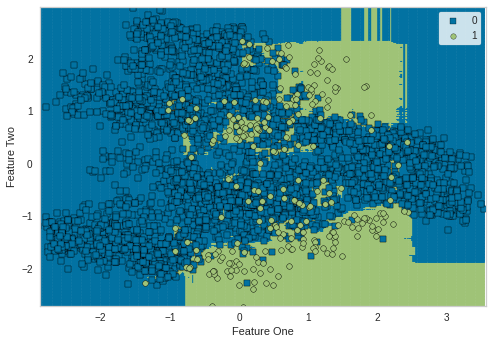

In [ ]:
plot_model(rf,"boundary",use_train_data=True)

**using test data**

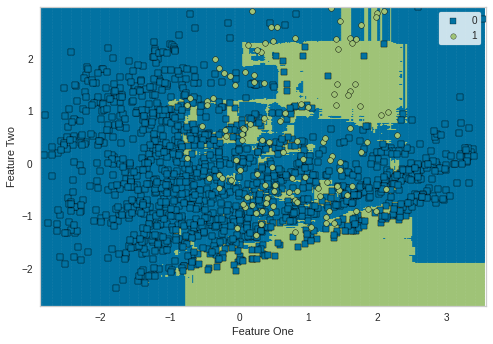

In [ ]:
plot_model(best_models[0],'boundary',use_train_data=False)

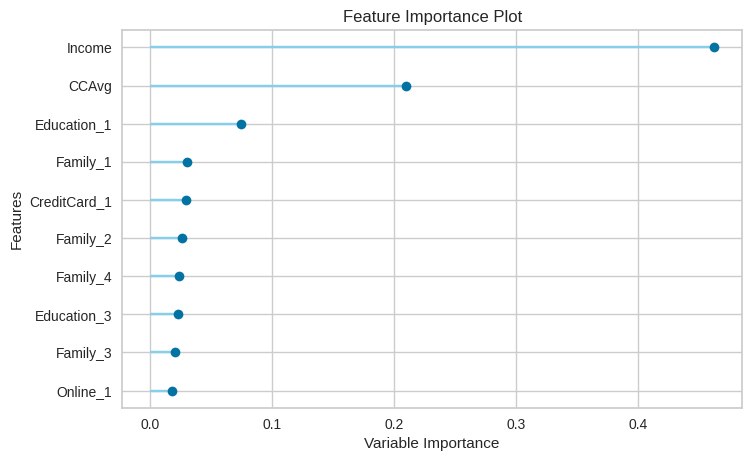

In [ ]:
plot_model(best_models[0],plot="feature")

>## **Hyperparameter tuning**

In [ ]:
create_model('rf')

In [ ]:
tuned_model_0 = tune_model(best_models[0],optimize="AUC",early_stopping=True,
                          
                          choose_better=True,tuner_verbose=True)

In [ ]:
predict_model(tuned_model_0)

#**hyper-rf**

In [ ]:
import numpy as np
params = {"max_depth": np.random.randint(1, (len(get_config('X_train').columns)*.85),20),
          "max_features": np.random.randint(1, len(data.columns)-1,20),
          "min_samples_leaf": [2,3,4,5,6],
          "criterion": ["gini", "entropy"],
          "n_estimators":[i for i in range(440,460,1)]}
tuned_rf_custom = tune_model(best_models[0], custom_grid = params,n_iter=5,optimize='AUC',choose_better=True,tuner_verbose=True,search_algorithm='random',)

In [ ]:
tuned_rf_custom

In [ ]:
plot_model(tuned_rf_custom,'boundary')

In [ ]:
final = finalize_model(tuned_rf_custom)

In [ ]:
plot_model(final,"boundary")

In [ ]:
import pandas as pd

In [ ]:
best_model=tuned_rf_custom
final_model=finalize_model(best_model)

In [ ]:
save_model(final_model,'bank_loan')

In [ ]:
model_load=load_model('/content/bank_loan')

In [ ]:
data_unseen_for_testing=pd.read_excel('/content/unseen data of bank.xlsx')

In [ ]:
data_unseen_for_testing.head()

In [ ]:
unseen_predictions = predict_model(model_load, data=data_unseen_for_testing)
unseen_predictions

# ***6. DATA POST-PROCESSING*** 

In [ ]:
!pip install pycaret -q

In [ ]:
!pip install --upgrade streamlit -q

In [ ]:
!pip install ipykernel==4.10 # only for colab ,and after this please restart

  Using cached https://files.pythonhosted.org/packages/22/5e/69b0ae84e0cd7c8d4467e0a7b390c560d8c7642493329b15461b41e20fcc/ipykernel-4.10.0-py3-none-any.whl
ERROR: pydeck 0.6.2 has requirement ipykernel>=5.1.2; python_version >= "3.4", but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
  Found existing installation: ipykernel 5.5.3
    Uninstalling ipykernel-5.5.3:
      Successfully uninstalled ipykernel-5.5.3


In [ ]:
import streamlit#For checking correct installation of streamlit

In [ ]:
!pip install pyngrok -q #Testing SERVER- temporary web server provider

In [ ]:
from pycaret.classification import load_model, predict_model
import streamlit as st
import pandas as pd
import numpy as np
model = load_model('/content/bank_loan (1)')

2021-04-13 08:19:58.929 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
2021-04-13 08:19:59.311 INFO    logs: Initializing load_model()
2021-04-13 08:19:59.312 INFO    logs: load_model(model_name=/content/bank_loan (1), platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [ ]:
from pyngrok import ngrok
public_url = ngrok.connect(port='80')
print (public_url)

2021-04-13 08:20:02.454 INFO    pyngrok.ngrok: Opening tunnel named: http-80-f041954b-a1eb-4f22-a93f-7430bc9d2910
2021-04-13 08:20:02.485 INFO    pyngrok.process.ngrok: t=2021-04-13T08:20:02+0000 lvl=info msg="no configuration paths supplied"
2021-04-13 08:20:02.488 INFO    pyngrok.process.ngrok: t=2021-04-13T08:20:02+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
2021-04-13 08:20:02.494 INFO    pyngrok.process.ngrok: t=2021-04-13T08:20:02+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
2021-04-13 08:20:02.497 INFO    pyngrok.process.ngrok: t=2021-04-13T08:20:02+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040
2021-04-13 08:20:02.734 INFO    pyngrok.process.ngrok: t=2021-04-13T08:20:02+0000 lvl=info msg="tunnel session started" obj=tunnels.session
2021-04-13 08:20:02.735 INFO    pyngrok.process.ngrok: t=2021-04-13T08:20:02+0000 lvl=info msg="client session established" obj=csess id=a508a7484dcd
2

NgrokTunnel: "http://91bcfb0a0424.ngrok.io" -> "http://localhost:80"


2021-04-13 08:20:02.935 INFO    pyngrok.process.ngrok: t=2021-04-13T08:20:02+0000 lvl=info msg=start pg="/api/tunnels/http-80-f041954b-a1eb-4f22-a93f-7430bc9d2910 (http)" id=4ee444d240b05165
2021-04-13 08:20:02.938 INFO    pyngrok.process.ngrok: t=2021-04-13T08:20:02+0000 lvl=info msg=end pg="/api/tunnels/http-80-f041954b-a1eb-4f22-a93f-7430bc9d2910 (http)" id=4ee444d240b05165 status=200 dur=145.915µs


In [ ]:
import pycaret
pycaret.__version__

'2.3.0'

In [ ]:
import pandas
pandas.__version__

'1.1.5'

In [ ]:
import numpy
numpy.__version__

'1.19.5'

In [ ]:
import streamlit
streamlit.__version__

'0.80.0'

In [ ]:
import PIL
PIL.__version__

'7.1.2'

In [ ]:
requirements="""
pandas==1.1.5
numpy==1.19.5
streamlit==0.80.0
pycaret==2.3.0
Pillow==8.0.1
"""

%store requirements >requirements.txt

Writing 'requirements' (str) to file 'requirements.txt'.


ID,	Age,	Experience	,Income,	ZIP, Code,	Family	,CCAvg	,Education	,Mortgage,	Personal Loan	,Securities Account,	CD Account,	Online,	CreditCard

In [ ]:
stream_personal_loan1=""" 
from pycaret.classification import load_model, predict_model
import streamlit as st
import pandas as pd
import numpy as np
model = load_model('bank_loan (1)')






def predict(model, input_df):
    predictions_df = predict_model(estimator=model, data=input_df)
    predictions = predictions_df['Label'][0]
    return predictions

def run():
    from PIL import Image
    image = Image.open('/content/sharon-mccutcheon-8lnbXtxFGZw-unsplash.jpg')
    image_office = Image.open('/content/scott-graham-5fNmWej4tAA-unsplash.jpg')
    st.image(image,use_column_width=True)
    add_selectbox = st.sidebar.selectbox(
    "How would you like to predict?",
    ("Online", "Batch"))
    st.sidebar.info('This app is created to predict if customer is eligible for personal loan or not')
    st.sidebar.success('https://www.pycaret.org')
    st.sidebar.image(image_office)
    st.title("Predicting chance to have personal loan")
    if add_selectbox == 'Online':
        ID=st.number_input('ID' , min_value=1.0, max_value=10000.0, value=1.0)
        Age=st.number_input('Age',min_value=1.0, max_value=70.0, value=1.0)
        Experience=st.number_input('Experience',min_value=1.0, max_value=50.0, value=1.0)
        Income=st.number_input('Income',min_value=1.0, max_value=500.0, value=1.0)
        ZIP_Code=st.number_input('ZIP Code',min_value=1.0, max_value=100000.0, value=1.0)
        Family=st.number_input('Family',min_value=1.0, max_value=10.0, value=1.0)
        CCAvg=st.number_input('CCAvg',min_value=0.0, max_value=10.0, value=1.0)
        Education= st.selectbox('Education',['Undergrad','Graduate','Advanced/Professional'])
        Mortgage=st.number_input('Mortgage',min_value=0.0, max_value=1000.0, value=1.0)
        Securities_Account=st.number_input('Securities Account',min_value=0.0, max_value=1.0, value=1.0)
        CD_Account=st.number_input('CD Account',min_value=0.0, max_value=1.0, value=1.0)
        Online=st.number_input('Online',min_value=0.0, max_value=1.0, value=1.0)
        CreditCard=st.number_input('CreditCard',min_value=0.0, max_value=1.0, value=1.0)
        output=""
        input_dict={'ID':ID,'Age':Age,'Experience':Experience,'Income':Income,'ZIP Code':ZIP_Code,'Family':Family,'CCAvg' : CCAvg,'Education':Education,'Mortgage':Mortgage,'Securities Account':Securities_Account,'CD Account':CD_Account,'Online':Online,'CreditCard':CreditCard}
        input_df = pd.DataFrame([input_dict])
        if st.button(" predict eligible or not"):
            output = predict(model=model, input_df=input_df)
            output = str(output)
            if output == '0' :
              output="SORRY! YOU ARE NOT ELIGIBLE FOR PERSONAL LOAN"
            else:
              output="CONGRATS! YOU ARE ELIGIBLE FOR PERSONAL LOAN"
        st.success('The Prediction   --  {}'.format(output))
    if add_selectbox == 'Batch':
        file_upload = st.file_uploader("Upload csv file for predictions", type=["csv"])
        if file_upload is not None:
            data = pd.read_csv(file_upload)            
            predictions = predict_model(estimator=model,data=data)
            st.write(predictions)
def main():
    run()

if __name__ == "__main__":
  main()
"""

%store stream_personal_loan1 >stream_personal_loan1.py

Writing 'stream_personal_loan1' (str) to file 'stream_personal_loan1.py'.


In [ ]:
!streamlit run --server.port 80 stream_personal_loan1.py >/dev/null

2021-04-13 08:20:19.115 An update to the [server] config option section was detected. To have these changes be reflected, please restart streamlit.
2021-04-13 08:20:20.328 NumExpr defaulting to 2 threads.
2021-04-13 08:20:20.675 Initializing load_model()
2021-04-13 08:20:20.675 load_model(model_name=bank_loan (1), platform=None, authentication=None, verbose=True)


2021-04-13 08:20:30.668 INFO    pyngrok.process.ngrok: t=2021-04-13T08:20:30+0000 lvl=info msg="join connections" obj=join id=b917fbe58f69 l=127.0.0.1:80 r=202.164.130.197:47459
2021-04-13 08:20:31.725 INFO    pyngrok.process.ngrok: t=2021-04-13T08:20:31+0000 lvl=info msg="join connections" obj=join id=0fd4c0ee97e9 l=127.0.0.1:80 r=202.164.130.197:47459
2021-04-13 08:20:31.731 INFO    pyngrok.process.ngrok: t=2021-04-13T08:20:31+0000 lvl=info msg="join connections" obj=join id=cf13780337b0 l=127.0.0.1:80 r=202.164.130.197:47974
2021-04-13 08:20:38.991 INFO    pyngrok.process.ngrok: t=2021-04-13T08:20:38+0000 lvl=info msg="join connections" obj=join id=72fd9e9f1b48 l=127.0.0.1:80 r=202.164.130.197:3219
2021-04-13 08:20:39.561 INFO    pyngrok.process.ngrok: t=2021-04-13T08:20:39+0000 lvl=info msg="join connections" obj=join id=e13cbd6405e5 l=127.0.0.1:80 r=202.164.130.197:47974
